## 1. Time Analysis

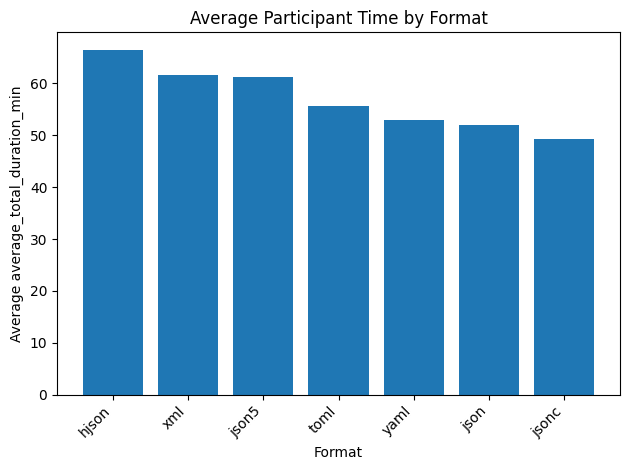

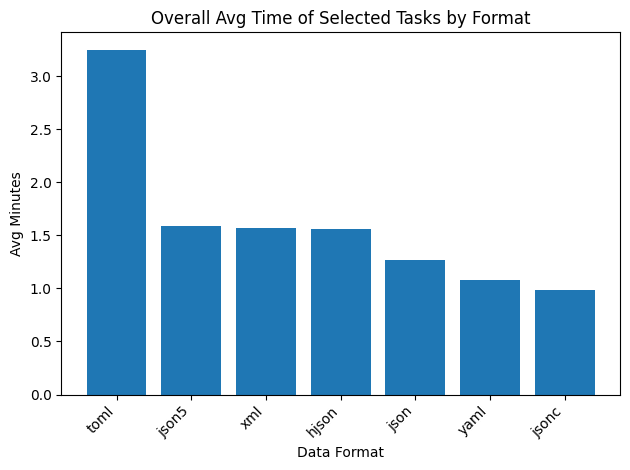

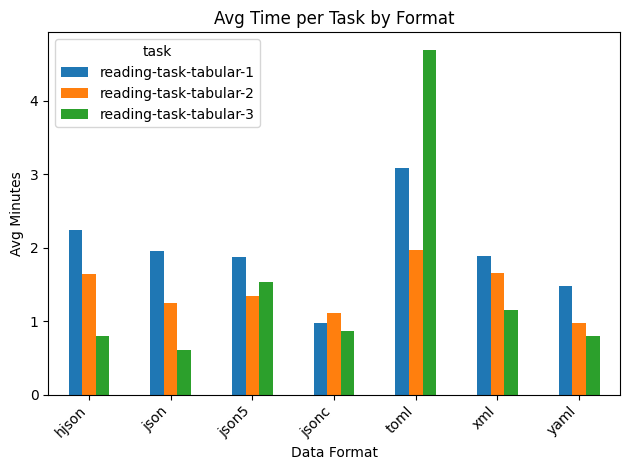

In [1]:
import sys
sys.path.append('/Users/shiyihe/Desktop/USABILITY_ANALYSIS')   

from duration_processor import (
    load_quiz_data,
    extract_format_time,
    sanitize_task_names,
    summarize_participant_by_format,
    plot_participant_time_by_format,
    summarize_tasks_by_format,
    plot_tasks_time_by_format,
    filter_tasks_by_list,
    participant_format_statistics
)


# load data , rename task name, etc,.
all_data = load_quiz_data('/Users/shiyihe/Desktop/USABILITY_ANALYSIS/tabular')

# extract format and duration
# df_participant: summarize participant's total time spent by format
df_task, df_participant = extract_format_time(all_data)

# clean 'format' from task name
df_task_clean = sanitize_task_names(df_task)

# average total time spent by format
df_part_summary = summarize_participant_by_format(df_participant)
fig1 = plot_participant_time_by_format(df_part_summary)

# 1. all tasks average time spent by format
task_list=['reading-task-tabular-1', 'reading-task-tabular-2', 'reading-task-tabular-3']
df_filtered = filter_tasks_by_list(df_task_clean, task_list)

df_overall = summarize_tasks_by_format(
    df_task_clean,
    metric='duration_min',
    task_list=task_list,
    mode='overall'
)
fig2 = plot_tasks_time_by_format(
    df_overall,
    metric='average_duration_min',
    mode='overall',
    title='Overall Avg Time of Selected Tasks by Format',
    xlabel='Data Format',
    ylabel='Avg Minutes'
)

# 2. each task average time spent by format
df_by_task = summarize_tasks_by_format(
    df_task_clean,
    task_list=task_list,
    metric='duration_min',
    mode='by_task'
)
fig3 = plot_tasks_time_by_format(
    df_by_task,
    metric='average_duration_min',
    mode='by_task',
    title='Avg Time per Task by Format',
    xlabel='Data Format',
    ylabel='Avg Minutes'
)

In [2]:
df_participant

,participantId,format,total_duration_sec,total_duration_min
0,6697c8b6d9d7baa7edd8c4d3,hjson,4695.463,78.26
1,67e25388d573ec2d5f1c8442,yaml,4214.973,70.25
2,67e5cf90b79d0874e1cf16b0,toml,4366.063,72.77
3,67d00f24466a67ba7e41228e,toml,4482.184,74.70
4,66475d6f7b27e4443ef0d031,json,1200.992,20.02
...,...,...,...,...
58,67ab650c320eccf6141d4010,jsonc,3356.075,55.93
59,65fad673a546ab14baf2f8d3,json5,3510.722,58.51
60,67f1c7bd6f1c4a3d8deae02f,toml,3569.983,59.50
61,67adb27bd5f5776fcb16da62,hjson,3737.170,62.29


In [3]:
format_counts = participant_format_statistics(df_participant)
print(format_counts)

Total number of valid participants: 63
format
yaml     11
jsonc    11
hjson     9
toml      9
json      8
json5     8
xml       7
Name: count, dtype: int64


## 2. turorial and quiz analysis

In [37]:
import sys
sys.path.append('/Users/shiyihe/Desktop')  # Adjust path as needed

from quiz_evaluator import (
    evaluate_quiz_answers_from_tutorial,
    analyze_nasa_and_post_surveys,
    extract_post_task_questions
)

# Usage example:
all_data = load_quiz_data('/Users/shiyihe/Desktop/tabular')  # from previous package
df_quiz = evaluate_quiz_answers_from_tutorial(all_data)
df_nasa, df_post = analyze_nasa_and_post_surveys(all_data)
df_post_q = extract_post_task_questions(all_data)

In [39]:
df_quiz


,participantId,quiz_key,correct_answer,user_final_answer,is_correct,num_wrong_attempts,all_wrong_attempts_list,all_wrong_attempts_frequency,wrong_choice_distribution,wrong_choice_count
0,6697c8b6d9d7baa7edd8c4d3,tutorial-hjson-part1,"[A, C]","[A, C]",True,2,"{'id': 'quiz-hjson-part1', 'value': [['B'], ['...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...",7
1,6697c8b6d9d7baa7edd8c4d3,tutorial-hjson-part2,"[A, B, C, D]","[B, D, C, A]",True,2,"{'id': 'quiz-hjson-part2', 'value': [['B', 'D']]}","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...",7
2,67e25388d573ec2d5f1c8442,tutorial-yaml-part1,"[B, C, D]","[C, D, B]",True,0,[],{},{},0
3,67e25388d573ec2d5f1c8442,tutorial-yaml-part2,"[B, C, D]","[C, B, D]",True,2,"{'id': 'quiz-yaml-part2', 'value': [['A', 'B',...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...",7
4,67e5cf90b79d0874e1cf16b0,tutorial-toml-part1,"[B, D]","[D, B]",True,2,"{'id': 'quiz-toml-part1', 'value': [['A', 'D']]}","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...",7
...,...,...,...,...,...,...,...,...,...,...
109,65fad673a546ab14baf2f8d3,tutorial-json5-part2,"[A, B, C, D]","[B, C, D, A]",True,0,[],{},{},0
110,67f1c7bd6f1c4a3d8deae02f,tutorial-toml-part1,"[B, D]","[B, D]",True,0,[],{},{},0
111,67f1c7bd6f1c4a3d8deae02f,tutorial-toml-part2,"[A, B, D]","[A, B, D]",True,0,[],{},{},0
112,67adb27bd5f5776fcb16da62,tutorial-hjson-part1,"[A, C]","[A, C]",True,2,"{'id': 'quiz-hjson-part1', 'value': [['A', 'B'...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...","{'i': 1, 'd': 1, 'v': 1, 'a': 1, 'l': 1, 'u': ...",7


In [19]:
import pandas as pd
import re
from collections import Counter

def evaluate_quiz_answers_from_tutorial(all_data):
    quiz_results = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 提取 participantId
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                answer_block = task_info.get('answer', {})
                if isinstance(answer_block, dict) and 'prolificId' in answer_block:
                    participant_id = answer_block['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        for task_key, task_info in answers.items():
            if not isinstance(task_info, dict):
                continue

            if not re.match(r"tutorial-\w+-part[12]", task_key):
                continue

            correct_ans_list = task_info.get("correctAnswer", [])
            if correct_ans_list and isinstance(correct_ans_list[0], dict):
                quiz_id = correct_ans_list[0].get("id")
                correct_answer = correct_ans_list[0].get("answer", [])
            else:
                continue

            correct_ans_set = set(correct_answer)

            answer_block = task_info.get("answer", {})
            user_final_ans = answer_block.get(quiz_id, [])
            is_correct = set(user_final_ans) == correct_ans_set

            incorrect_info = task_info.get("incorrectAnswers", {}).get(quiz_id, {})
            attempts = incorrect_info.get("value", [])  # e.g., [['B', 'C'], ['B']]

            counter = Counter()
            for attempt in attempts:
                counter.update(attempt)

            wrong_choice_distribution = {
                choice: count for choice, count in counter.items() if choice not in correct_ans_set
            }
            wrong_choice_count = sum(wrong_choice_distribution.values())

            quiz_results.append({
                "participantId": participant_id,
                "quiz_key": task_key,
                "correct_answer": correct_answer,
                "user_final_answer": user_final_ans,
                "is_correct": is_correct,
                "num_wrong_attempts": len(attempts),
                "all_wrong_attempts_list": attempts,  # ✅ 新增列
                "all_wrong_attempts_frequency": dict(counter),
                "wrong_choice_distribution": wrong_choice_distribution,
                "wrong_choice_count": wrong_choice_count
            })

    return pd.DataFrame(quiz_results)


df_quiz_results = evaluate_quiz_answers_from_tutorial(all_data)
df_quiz_results


,participantId,quiz_key,correct_answer,user_final_answer,is_correct,num_wrong_attempts,all_wrong_attempts_list,all_wrong_attempts_frequency,wrong_choice_distribution,wrong_choice_count
0,shiyi_t_p5,tutorial-toml-part1,"[B, D]","[B, D]",True,1,"[[A, B, D]]","{'A': 1, 'B': 1, 'D': 1}",{'A': 1},1
1,shiyi_t_p5,tutorial-toml-part2,"[A, B, D]","[A, B, D]",True,1,"[[A, B, C, D]]","{'A': 1, 'B': 1, 'C': 1, 'D': 1}",{'C': 1},1
2,shiyi_t_p3,tutorial-json-part1,[B],[B],True,0,[],{},{},0
3,shiyi_t_p3,tutorial-json-part2,[D],[D],True,0,[],{},{},0
4,shiyhi_t_p4,tutorial-xml-part1,"[A, B]","[A, B]",True,0,[],{},{},0
5,shiyhi_t_p4,tutorial-xml-part2,"[B, D]","[B, D]",True,3,"[[A, B], [B], [B, C]]","{'A': 1, 'B': 3, 'C': 1}","{'A': 1, 'C': 1}",2
6,shiyi_t_p1,tutorial-json5-part1,"[C, D]","[D, C]",True,4,"[[B, C], [B], [D], [D, B]]","{'B': 3, 'C': 1, 'D': 2}",{'B': 3},3
7,shiyi_t_p1,tutorial-json5-part2,"[A, B, C, D]","[A, B, C, D]",True,0,[],{},{},0
8,shiyi_t_p6,tutorial-yaml-part1,"[B, C, D]","[C, D, B]",True,1,"[[A, B, C, D]]","{'A': 1, 'B': 1, 'C': 1, 'D': 1}",{'A': 1},1
9,shiyi_t_p6,tutorial-yaml-part2,"[B, C, D]","[B, C, D]",True,1,"[[A, B, C, D]]","{'A': 1, 'B': 1, 'C': 1, 'D': 1}",{'A': 1},1


## survey analysis

In [23]:
import pandas as pd
import re

def analyze_nasa_and_post_surveys(all_data):
    nasa_rows = []
    post_survey_rows = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # participantId 提取
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                ans = task_info.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # format 提取
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            format_name = "unknown"

        # =========== 处理 NASA-TLX =============
        nasa_key = '$nasa-tlx.co.nasa-tlx'
        if nasa_key in answers:
            nasa_info = answers[nasa_key]
            ans = nasa_info.get('answer', {})
            start = nasa_info.get('startTime')
            end = nasa_info.get('endTime')
            duration_sec = (end - start) / 1000.0 if start and end else None

            row = {
                'participantId': participant_id,
                'format': format_name,
                'startTime': start,
                'endTime': end,
                'duration_sec': duration_sec
            }

            for dim in ['mental-demand', 'physical-demand', 'temporal-demand', 
                        'performance', 'effort', 'frustration']:
                row[dim] = ans.get(dim)

            nasa_rows.append(row)

        # =========== 处理 Post-task Survey =============
        post_key = 'post-task-survey-tlx'
        if post_key in answers:
            post_info = answers[post_key]
            ans = post_info.get('answer', {})
            start = post_info.get('startTime')
            end = post_info.get('endTime')
            duration_sec = (end - start) / 1000.0 if start and end else None

            row = {
                'participantId': participant_id,
                'format': format_name,
                'startTime': start,
                'endTime': end,
                'duration_sec': duration_sec
            }

            for q in ['q7', 'q8', 'q9', 'q9-other', 'q10', 'q11', 
                      'q13', 'q13-other', 'q14', 'q14-other']:
                row[q] = ans.get(q)

            # 展开 q12
            q12_block = ans.get('q12', {})
            if isinstance(q12_block, dict):
                for fmt, level in q12_block.items():
                    row[f'q12_{fmt}'] = level

            post_survey_rows.append(row)

    df_nasa = pd.DataFrame(nasa_rows)
    df_post_survey = pd.DataFrame(post_survey_rows)
    return df_nasa, df_post_survey

df_nasa, df_post_survey = analyze_nasa_and_post_surveys(all_data)

print("NASA TLX Survey:")
df_nasa



NASA TLX Survey:


,participantId,format,startTime,endTime,duration_sec,mental-demand,physical-demand,temporal-demand,performance,effort,frustration
0,shiyi_t_p5,toml,1745900483621,1745900485416,1.795,50,50,50,50,50,50
1,shiyi_t_p3,json,1745899396955,1745899398756,1.801,50,50,50,50,50,50
2,shiyhi_t_p4,xml,1745899961355,1745899963519,2.164,50,50,50,50,50,50
3,shiyi_t_p1,json5,1745897510021,1745897519682,9.661,42,58,57,56,57,55
4,shiyi_t_p6,yaml,1745900750505,1745900752038,1.533,50,50,50,50,50,50
5,shiyi_t_p2,jsonc,1745898138114,1745898140808,2.694,50,50,50,50,50,50


In [24]:
print("\nPost-task Survey TLX:")
df_post_survey


Post-task Survey TLX:


,participantId,format,startTime,endTime,duration_sec,q7,q8,q9,q9-other,q10,...,q13-other,q14,q14-other,q12_JSON,q12_JSONC,q12_JSON5,q12_HJSON,q12_YAML,q12_TOML,q12_XML
0,shiyi_t_p5,toml,1745900485492,1745900501223,15.731,,,Master's,,4,...,,"[No, I do not have any related conditions.]",,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all
1,shiyi_t_p3,json,1745899398834,1745899415474,16.640,,,Master's,,3,...,,"[No, I do not have any related conditions.]",,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all
2,shiyhi_t_p4,xml,1745899963596,1745899980520,16.924,,,Master's,,3,...,,"[No, I do not have any related conditions.]",,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all
3,shiyi_t_p1,json5,1745897519757,1745897554067,34.310,n,n,PhD,,6,...,,"[No, I do not have any related conditions.]",,Used it a few times,Used it a few times,Heard of it but never used,Heard of it but never used,Heard of it but never used,Heard of it but never used,Heard of it but never used
4,shiyi_t_p6,yaml,1745900752106,1745900769064,16.958,,,Master's,,2,...,,"[Color vision deficiency (CVD) (e.g., difficul...",,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all
5,shiyi_t_p2,jsonc,1745898140880,1745898157191,16.311,,,Master's,,6,...,,"[No, I do not have any related conditions.]",,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all,Not familiar at all


In [29]:
import pandas as pd
import re

def extract_post_task_questions(all_data):
    rows = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 提取 participantId
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                ans = task_info.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # 提取 format （tutorial-xxx-part1）
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            format_name = "unknown"

        for key, content in answers.items():
            if "_post-task-question" in key and isinstance(content, dict):
                base_task_name = key.replace("_post-task-question", "")

                answer_block = content.get('answer', {})
                difficulty = answer_block.get('difficulty')
                confidence = answer_block.get('confidence')

                start = content.get('startTime')
                end = content.get('endTime')
                duration_sec = (end - start) / 1000.0 if start and end else None

                rows.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": base_task_name,
                    "startTime": start,
                    "endTime": end,
                    "duration_sec": duration_sec,
                    "difficulty": difficulty,
                    "confidence": confidence
                })

    return pd.DataFrame(rows)

df_post_task_questions = extract_post_task_questions(all_data)
df_post_task_questions


,participantId,format,task,startTime,endTime,duration_sec,difficulty,confidence
0,shiyi_t_p5,toml,writing-task-NL,1745900047204,1745900049586,2.382,2,2
1,shiyi_t_p5,toml,reading-task-tabular-toml-1,1745900259686,1745900262161,2.475,2,2
2,shiyi_t_p5,toml,reading-task-tabular-toml-2,1745900277017,1745900280003,2.986,2,2
3,shiyi_t_p5,toml,reading-task-tabular-toml-3,1745900286965,1745900290930,3.965,3,3
4,shiyi_t_p5,toml,reading-task-tabular-toml-4,1745900298630,1745900301137,2.507,2,2
...,...,...,...,...,...,...,...,...
61,shiyi_t_p2,jsonc,writing-task-tabular-jsonc,1745898077655,1745898080533,2.878,3,4
62,shiyi_t_p2,jsonc,modifying-task-tabular-jsonc-1,1745898100473,1745898103367,2.894,3,4
63,shiyi_t_p2,jsonc,modifying-task-tabular-jsonc-2,1745898110057,1745898112526,2.469,2,3
64,shiyi_t_p2,jsonc,modifying-task-tabular-jsonc-3,1745898119931,1745898124409,4.478,5,4


In [34]:
import pandas as pd
import re

def extract_writing_modifying_code(all_data):
    rows = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 提取 participantId
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                ans = task_info.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # 提取 format（tutorial-xxx-part1）
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            format_name = "unknown"

        for key, content in answers.items():
            # ✅ 只提取真正的 writing / modifying task，不要 post-task-question
            if (key.startswith('writing-task-') or key.startswith('modifying-task-tabular-')) \
               and '_post-task-question' not in key and isinstance(content, dict):

                answer_block = content.get('answer', {})
                # 只取 answer 中的 code
                if isinstance(answer_block, dict):
                    code_text = answer_block.get('code')
                else:
                    code_text = None

                help_click_count = content.get('helpButtonClickedCount', None)
                start = content.get('startTime')
                end = content.get('endTime')
                duration_sec = (end - start) / 1000.0 if start and end else None

                rows.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "startTime": start,
                    "endTime": end,
                    "duration_sec": duration_sec,
                    "code": code_text,
                    "helpButtonClickedCount": help_click_count
                })

    return pd.DataFrame(rows)


df_writing_modifying = extract_writing_modifying_code(all_data)
df_writing_modifying



,participantId,format,task,startTime,endTime,duration_sec,code,helpButtonClickedCount
0,shiyi_t_p5,toml,writing-task-NL,1745900031453,1745900047144,15.691,"""My life is very monotonous,"" the fox said. ""I...",0
1,shiyi_t_p5,toml,writing-task-tabular-toml,1745900321187,1745900439032,117.845,"[[patients]]\nname = ""John""\n\n [[patients.te...",0
2,shiyi_t_p5,toml,modifying-task-tabular-toml-1,1745900441565,1745900448604,7.039,"[movies]\n\n[[movies.movie]]\ntitle = ""After D...",0
3,shiyi_t_p5,toml,modifying-task-tabular-toml-2,1745900451122,1745900463506,12.384,"[movies]\n\n[[movies.movie]]\ntitle = ""After D...",0
4,shiyi_t_p5,toml,modifying-task-tabular-toml-3,1745900467134,1745900471231,4.097,"[movies]\n\n[[movies.movie]]\ntitle = ""After D...",0
5,shiyi_t_p5,toml,modifying-task-tabular-toml-4,1745900474470,1745900481296,6.826,"[movies]\n\n[[movies.movie]]\ntitle = ""After D...",0
6,shiyi_t_p3,json,writing-task-NL,1745898260860,1745898318706,57.846,"""My life is very monotonous,"" the fox said. ""I...",0
7,shiyi_t_p3,json,writing-task-tabular-json,1745898407276,1745898420397,13.121,"{\n ""patients"": [\n {\n ""name"": ""John...",0
8,shiyi_t_p3,json,modifying-task-tabular-json-1,1745898422706,1745898461847,39.141,"{\n ""movies"": {\n ""movie"": [\n {\n ...",0
9,shiyi_t_p3,json,modifying-task-tabular-json-2,1745898464365,1745898498990,34.625,"{\n ""movies"": {\n ""movie"": [\n {\n ...",0


In [35]:
import tempfile
import subprocess
import json
import toml
import yaml
import re
import pandas as pd

# --------------------------
# 正确标准答案
# --------------------------
correct_nl_answer = '"My life is very monotonous," the fox said. "I hunt chickens; men hunt me. All the chickens are just alike, and all the men are just alike. And, in consequence, I am a little bored. But if you tame me, it will be as if the sun came to shine on my life."'

correct_tabular_data = {
  "patients": [
    {
      "name": "John",
      "tests": [
        {
          "id": 1,
          "result": "Normal"
        },
        {
          "id": 2,
          "result": "Elevated Cholesterol"
        }
      ]
    },
    {
      "name": "Michael",
      "tests": [
        {
          "id": 1,
          "result": "Normal"
        }
      ],
      "treatment": "Regular Monitoring"
    }
  ]
}

# --------------------------
# 工具函数：用 git diff 比较两段字符串
# --------------------------
def git_diff_string(str1, str2):
    with tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as f1, \
         tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as f2:
        f1.write(str1)
        f2.write(str2)
        f1_path = f1.name
        f2_path = f2.name

    result = subprocess.run(['git', 'diff', '--no-index', f1_path, f2_path],
                            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    diff_output = result.stdout
    added_lines = 0
    removed_lines = 0

    for line in diff_output.splitlines():
        if line.startswith('+') and not line.startswith('+++'):
            added_lines += 1
        elif line.startswith('-') and not line.startswith('---'):
            removed_lines += 1

    return {
        "diff_text": diff_output if diff_output else "No differences found.",
        "num_added_lines": added_lines,
        "num_removed_lines": removed_lines,
        "total_changes": added_lines + removed_lines
    }

# --------------------------
# 主函数：分析 writing task 正确率
# --------------------------
def analyze_writing_task_accuracy(all_data):
    results = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 提取 participantId
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                ans = task_info.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # 提取 format（根据 tutorial-xxx-part1 来推测）
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            format_name = "unknown"

        # 遍历所有 writing-task
        for key, content in answers.items():
            if key.startswith('writing-task-') and '_post-task-question' not in key and isinstance(content, dict):
                answer_block = content.get('answer', {})
                code = answer_block.get('code') if isinstance(answer_block, dict) else None

                if code is None:
                    continue  # 跳过没有 code 的回答

                # 判断是哪种任务
                if key == 'writing-task-NL':
                    # 处理 NL 类型
                    gold_answer = correct_nl_answer.strip()
                    user_answer = code.strip()

                elif key.startswith('writing-task-tabular-'):
                    # 处理 Tabular 类型
                    try:
                        if format_name in ["json", "jsonc", "json5", "hjson"]:
                            gold_answer = json.dumps(correct_tabular_data, indent=2, sort_keys=True)
                        elif format_name == "toml":
                            gold_answer = toml.dumps(correct_tabular_data)
                        elif format_name == "yaml":
                            gold_answer = yaml.dump(correct_tabular_data, sort_keys=False)
                        else:
                            gold_answer = json.dumps(correct_tabular_data, indent=2, sort_keys=True)
                    except Exception as e:
                        print(f"Error serializing correct answer for {format_name}: {e}")
                        continue

                    user_answer = code.strip()

                else:
                    continue  # 忽略其他

                # 做 git diff
                diff_result = git_diff_string(gold_answer, user_answer)

                results.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "num_added_lines": diff_result['num_added_lines'],
                    "num_removed_lines": diff_result['num_removed_lines'],
                    "total_changes": diff_result['total_changes'],
                    "diff_text": diff_result['diff_text']
                })

    return pd.DataFrame(results)
df_writing_accuracy = analyze_writing_task_accuracy(all_data)
df_writing_accuracy

,participantId,format,task,num_added_lines,num_removed_lines,total_changes,diff_text
0,shiyi_t_p5,toml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
1,shiyi_t_p5,toml,writing-task-tabular-toml,9,10,19,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
2,shiyi_t_p3,json,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
3,shiyi_t_p3,json,writing-task-tabular-json,0,0,0,No differences found.
4,shiyhi_t_p4,xml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
5,shiyhi_t_p4,xml,writing-task-tabular-xml,24,27,51,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
6,shiyi_t_p1,json5,writing-task-NL,1,1,2,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
7,shiyi_t_p1,json5,writing-task-tabular-json5,16,26,42,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
8,shiyi_t_p6,yaml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
9,shiyi_t_p6,yaml,writing-task-tabular-yaml,12,11,23,diff --git a/var/folders/hs/htjkkv116fv94g1llc...


In [40]:
import tempfile
import subprocess
import json
import toml
import yaml
import xmltodict
import re
import pandas as pd
from collections import OrderedDict

# 正确标准答案（结构体）
correct_tabular_data = {
    "patients": [
        {
            "name": "John",
            "tests": [
                {"id": 1, "result": "Normal"},
                {"id": 2, "result": "Elevated Cholesterol"}
            ]
        },
        {
            "name": "Michael",
            "tests": [
                {"id": 1, "result": "Normal"}
            ],
            "treatment": "Regular Monitoring"
        }
    ]
}

correct_nl_answer = '"My life is very monotonous," the fox said. "I hunt chickens; men hunt me. All the chickens are just alike, and all the men are just alike. And, in consequence, I am a little bored. But if you tame me, it will be as if the sun came to shine on my life."'

# 工具函数：git diff 比较两段文本
def git_diff_string(str1, str2):
    with tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as f1, \
         tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as f2:
        f1.write(str1.strip())
        f2.write(str2.strip())
        f1_path = f1.name
        f2_path = f2.name

    result = subprocess.run(['git', 'diff', '--no-index', f1_path, f2_path],
                            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    diff_output = result.stdout
    added_lines = 0
    removed_lines = 0

    for line in diff_output.splitlines():
        if line.startswith('+') and not line.startswith('+++'):
            added_lines += 1
        elif line.startswith('-') and not line.startswith('---'):
            removed_lines += 1

    return {
        "diff_text": diff_output if diff_output else "No differences found.",
        "num_added_lines": added_lines,
        "num_removed_lines": removed_lines,
        "total_changes": added_lines + removed_lines
    }

# 核心函数：分析 writing task 正确率
def analyze_writing_task_accuracy(all_data):
    results = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 获取 participantId
        participant_id = None
        for task_info in answers.values():
            if isinstance(task_info, dict):
                ans = task_info.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # 获取 format
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            # fallback 用 task key 推断
            for k in answers:
                if "writing-task-tabular-" in k:
                    format_name = k.replace("writing-task-tabular-", "").split("_")[0].lower()
                    break
        if format_name is None:
            format_name = "unknown"

        for key, content in answers.items():
            if key.startswith('writing-task-') and '_post-task-question' not in key and isinstance(content, dict):
                answer_block = content.get('answer', {})
                code = answer_block.get('code') if isinstance(answer_block, dict) else None
                if code is None:
                    continue

                # 标准答案构造
                try:
                    if key == "writing-task-NL":
                        gold_answer = correct_nl_answer.strip()
                        user_answer = code.strip()
                    elif key.startswith("writing-task-tabular-"):
                        if format_name in ["json", "jsonc", "json5", "hjson"]:
                            gold_answer = json.dumps(correct_tabular_data, indent=2, sort_keys=True)
                        elif format_name == "toml":
                            gold_answer = toml.dumps(correct_tabular_data)
                        elif format_name == "yaml":
                            gold_answer = yaml.dump(correct_tabular_data, sort_keys=False)
                        elif format_name == "xml":
                            # 使用 OrderedDict 构造标签名
                            xml_struct = OrderedDict({
                                "patients": OrderedDict({
                                    "patient": [
                                        OrderedDict({
                                            "name": "John",
                                            "tests": OrderedDict({
                                                "test": [
                                                    {"id": 1, "result": "Normal"},
                                                    {"id": 2, "result": "Elevated Cholesterol"}
                                                ]
                                            })
                                        }),
                                        OrderedDict({
                                            "name": "Michael",
                                            "treatment": "Regular Monitoring",
                                            "tests": OrderedDict({
                                                "test": [
                                                    {"id": 1, "result": "Normal"}
                                                ]
                                            })
                                        })
                                    ]
                                })
                            })
                            gold_answer = xmltodict.unparse(xml_struct, pretty=True)
                        else:
                            gold_answer = json.dumps(correct_tabular_data, indent=2, sort_keys=True)

                        user_answer = code.strip()

                    else:
                        continue  # 非 tabular 写作任务
                except Exception as e:
                    print(f"[!] Error building gold answer for {format_name}: {e}")
                    continue

                # diff
                diff_result = git_diff_string(gold_answer, user_answer)

                results.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "num_added_lines": diff_result['num_added_lines'],
                    "num_removed_lines": diff_result['num_removed_lines'],
                    "total_changes": diff_result['total_changes'],
                    "diff_text": diff_result['diff_text']
                })

    return pd.DataFrame(results)

df_writing_accuracy = analyze_writing_task_accuracy(all_data)
df_writing_accuracy


,participantId,format,task,num_added_lines,num_removed_lines,total_changes,diff_text
0,shiyi_t_p5,toml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
1,shiyi_t_p5,toml,writing-task-tabular-toml,10,9,19,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
2,shiyi_t_p3,json,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
3,shiyi_t_p3,json,writing-task-tabular-json,0,0,0,No differences found.
4,shiyhi_t_p4,xml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
5,shiyhi_t_p4,xml,writing-task-tabular-xml,22,24,46,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
6,shiyi_t_p1,json5,writing-task-NL,1,1,2,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
7,shiyi_t_p1,json5,writing-task-tabular-json5,16,26,42,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
8,shiyi_t_p6,yaml,writing-task-NL,2,1,3,diff --git a/var/folders/hs/htjkkv116fv94g1llc...
9,shiyi_t_p6,yaml,writing-task-tabular-yaml,12,11,23,diff --git a/var/folders/hs/htjkkv116fv94g1llc...


In [41]:
for idx, row in df_writing_accuracy.iterrows():
    print(f"Participant: {row['participantId']}")
    print(f"Format: {row['format']}")
    print(f"Task: {row['task']}")
    print("Diff Text:")
    print(row['diff_text'])
    print("="*80)  # 分隔线，方便阅读


Participant: shiyi_t_p5
Format: toml
Task: writing-task-NL
Diff Text:
diff --git a/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/tmp8w6f2rsn.txt b/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/tmp8v2e5oqv.txt
index 8888796..fa19c33 100644
--- a/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/tmp8w6f2rsn.txt
+++ b/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/tmp8v2e5oqv.txt
@@ -1 +1,2 @@
-"My life is very monotonous," the fox said. "I hunt chickens; men hunt me. All the chickens are just alike, and all the men are just alike. And, in consequence, I am a little bored. But if you tame me, it will be as if the sun came to shine on my life."
\ No newline at end of file
+"My life is very monotonous," the fox said. "I hunt chickens; men hunt me. All the chickens are just alike, and all the men are just alike.
+And, in consequence, I am a little bored. But if you tame me, it will be as if the sun came to shine on my life."
\ No newline at end of file

Participant: shiyi_t_p5
Format: tom

In [42]:
import json
import toml
import yaml
import xmltodict
import hjson
import re
import pandas as pd
from deepdiff import DeepDiff

# 正确结构答案
correct_tabular_data = {
    "patients": [
        {
            "name": "John",
            "tests": [
                {"id": 1, "result": "Normal"},
                {"id": 2, "result": "Elevated Cholesterol"}
            ]
        },
        {
            "name": "Michael",
            "tests": [
                {"id": 1, "result": "Normal"}
            ],
            "treatment": "Regular Monitoring"
        }
    ]
}

# 安全解析器：按格式解析用户输入字符串为结构
def safe_parse_answer(answer_str, fmt, participant_id="unknown"):
    try:
        if fmt in ['json', 'jsonc', 'json5', 'hjson']:
            return hjson.loads(answer_str)
        elif fmt == 'toml':
            return toml.loads(answer_str)
        elif fmt == 'yaml':
            return yaml.safe_load(answer_str)
        elif fmt == 'xml':
            return xmltodict.parse(answer_str)
        else:
            return hjson.loads(answer_str)
    except Exception as e:
        print(f"[!] Parse error for format '{fmt}' (participant: {participant_id}): {e}")
        print("---- offending code ----")
        print(answer_str[:500])
        print("------------------------")
        return {}

# DeepDiff 比较函数
def deep_diff_structured(gold, user):
    diff = DeepDiff(gold, user, verbose_level=2)
    if not diff:
        return {
            "diff": "No differences found.",
            "num_differences": 0,
            "breakdown": {}
        }

    diff_summary = {
        "dictionary_item_added": len(diff.get("dictionary_item_added", [])),
        "dictionary_item_removed": len(diff.get("dictionary_item_removed", [])),
        "values_changed": len(diff.get("values_changed", [])),
        "type_changes": len(diff.get("type_changes", [])),
        "other_changes": sum(len(v) for k, v in diff.items()
                             if k not in ["dictionary_item_added", "dictionary_item_removed", "values_changed", "type_changes"]),
    }

    total = sum(diff_summary.values())

    return {
        "diff": diff,
        "num_differences": total,
        "breakdown": diff_summary
    }

# 主函数：结构内容比对评分
def analyze_writing_task_deepdiff_score(all_data):
    rows = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 获取 participantId
        participant_id = None
        for a in answers.values():
            if isinstance(a, dict):
                ans = a.get('answer', {})
                if isinstance(ans, dict) and 'prolificId' in ans:
                    participant_id = ans['prolificId']
                    break
        if participant_id is None:
            participant_id = file_name

        # 提取 format
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if format_name is None:
            for k in answers:
                if "writing-task-tabular-" in k:
                    format_name = k.replace("writing-task-tabular-", "").split("_")[0].lower()
                    break
        if format_name is None:
            format_name = "unknown"

        # 遍历写作任务
        for key, content in answers.items():
            if key.startswith("writing-task-tabular-") and "_post-task-question" not in key and isinstance(content, dict):
                answer_block = content.get("answer", {})
                code = answer_block.get("code") if isinstance(answer_block, dict) else None
                if not code:
                    continue

                # 构建 gold_struct
                try:
                    if format_name == "xml":
                        gold_struct = xmltodict.parse(xmltodict.unparse({
                            "root": {
                                "patients": {
                                    "patient": [
                                        {
                                            "name": "John",
                                            "tests": {
                                                "test": [
                                                    {"id": 1, "result": "Normal"},
                                                    {"id": 2, "result": "Elevated Cholesterol"}
                                                ]
                                            }
                                        },
                                        {
                                            "name": "Michael",
                                            "treatment": "Regular Monitoring",
                                            "tests": {
                                                "test": [{"id": 1, "result": "Normal"}]
                                            }
                                        }
                                    ]
                                }
                            }
                        }, pretty=True))
                    else:
                        gold_struct = correct_tabular_data
                except Exception as e:
                    print(f"[!] Error building gold_struct for {format_name}: {e}")
                    continue

                # 处理用户结构
                if format_name == "xml":
                    user_code_wrapped = f"<root>{code.strip()}</root>"
                    user_struct = safe_parse_answer(user_code_wrapped, "xml", participant_id)
                else:
                    user_struct = safe_parse_answer(code.strip(), format_name, participant_id)

                # 比对
                diff_result = deep_diff_structured(gold_struct, user_struct)

                rows.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "num_differences": diff_result['num_differences'],
                    **diff_result['breakdown']
                })

    return pd.DataFrame(rows)

df_struct_diff = analyze_writing_task_deepdiff_score(all_data)
df_struct_diff


[!] Parse error for format 'xml' (participant: shiyhi_t_p4): mismatched tag: line 12, column 8
---- offending code ----
<root><patients>
  <patient>
    <name>John</name>
    <tests>
      <test>
        <id>1</id>
        <result>Normal</result>
      </test>
      <test>
        <id>2</id>
        <result>Elevated Cholesterol<result>
      </test>
    </tests>
  </patient>
  <patient>
    <name>Michael</name>
    <tests>
      <test>
        <id>1</id>
      </test>
    </tests>
    <treatment>Regular Monitoring</treatment>
  </patient>
</patients></root>
------------------------
[!] Parse error for format 'json5' (participant: shiyi_t_p1): Extra data: line 1 column 11 - line 17 column 2 (char 10 - 255)
---- offending code ----
"patients":[{
"name":"John",
"tests":[{"id":1,
    "result":"Normal"},
    {"id":2,
    "result":"Elevated Cholesterol"
}]
}},
{
    "name":"Michael",
    "test":[{
        "id":1,
        "result":"normal"
    }],
    "treatment":"regular monitoring"
}
]
----

,participantId,format,task,num_differences,dictionary_item_added,dictionary_item_removed,values_changed,type_changes,other_changes
0,shiyi_t_p5,toml,writing-task-tabular-toml,0,NaN,NaN,NaN,NaN,NaN
1,shiyi_t_p3,json,writing-task-tabular-json,1,0.0,0.0,0.0,1.0,0.0
2,shiyhi_t_p4,xml,writing-task-tabular-xml,1,0.0,0.0,0.0,1.0,0.0
3,shiyi_t_p1,json5,writing-task-tabular-json5,1,0.0,1.0,0.0,0.0,0.0
4,shiyi_t_p6,yaml,writing-task-tabular-yaml,0,NaN,NaN,NaN,NaN,NaN
5,shiyi_t_p2,jsonc,writing-task-tabular-jsonc,1,0.0,0.0,0.0,1.0,0.0


In [51]:
import json
import re
import hjson
import json5
import yaml
import toml
import xmltodict
from tree_sitter import Language, Parser
import zss

# ✅ 设置 Tree-sitter JSON parser（请确保 build/my-languages.so 已构建）
JSON_LANGUAGE = Language('build/my-languages.so', 'json')
parser = Parser()
parser.set_language(JSON_LANGUAGE)

# ✅ Tree node wrapper for ZSS
class NodeWrapper:
    def __init__(self, node, source):
        self.node = node
        self.source = source

    def get_label(self):
        return f"{self.node.type}:{self.source[self.node.start_byte:self.node.end_byte].decode('utf-8').strip()}"

    def get_children(self):
        return [NodeWrapper(child, self.source) for child in self.node.children]

def tree_size(node):
    return 1 + sum(tree_size(child) for child in node.get_children())

# ✅ 转换任意支持格式为标准 JSON 字符串（供 tree-sitter 使用）
def convert_to_json_string(code_str, fmt):
    fmt = fmt.lower()
    try:
        if fmt == "json":
            parsed = json.loads(code_str)
        elif fmt == "jsonc":
            code_str = re.sub(r"//.*?$", "", code_str, flags=re.MULTILINE)
            code_str = re.sub(r"/\*.*?\*/", "", code_str, flags=re.DOTALL)
            parsed = json.loads(code_str)
        elif fmt == "json5":
            parsed = json5.loads(code_str)
        elif fmt == "hjson":
            parsed = hjson.loads(code_str)
        elif fmt == "yaml":
            parsed = yaml.safe_load(code_str)
        elif fmt == "toml":
            parsed = toml.loads(code_str)
        elif fmt == "xml":
            code_str = code_str.strip()
            if not code_str.startswith("<root>"):
                code_str = f"<root>{code_str}</root>"
            parsed = xmltodict.parse(code_str)
        else:
            raise ValueError(f"Unsupported format: {fmt}")
        return json.dumps(parsed, indent=2, sort_keys=True)
    except Exception as e:
        raise ValueError(f"Error converting format {fmt} to JSON: {e}")

# ✅ 主函数：比较结构相似度并返回 Tree Edit Distance 等信息
def compare_structures_tree_edit_distance(code1, code2, fmt):
    try:
        json1 = convert_to_json_string(code1, fmt)
        json2 = convert_to_json_string(code2, fmt)
    except Exception as e:
        return {
            "error": f"Parse failed for format={fmt}: {str(e)}",
            "ted": None,
            "normalized_ted": None,
            "similarity_score": None
        }

    source1 = bytes(json1, "utf-8")
    source2 = bytes(json2, "utf-8")

    try:
        tree1 = parser.parse(source1)
        tree2 = parser.parse(source2)
    except Exception as e:
        return {"error": f"Tree parsing failed: {e}"}

    zss_tree1 = NodeWrapper(tree1.root_node, source1)
    zss_tree2 = NodeWrapper(tree2.root_node, source2)

    ted = zss.simple_distance(
        zss_tree1, zss_tree2,
        get_children=lambda node: node.get_children(),
        get_label=lambda node: node.get_label()
    )

    size1 = tree_size(zss_tree1)
    size2 = tree_size(zss_tree2)
    max_size = max(size1, size2)
    n_ted = ted / max_size if max_size else 0
    similarity = 1 - n_ted

    return {
        "ted": ted,
        "normalized_ted": round(n_ted, 4),
        "similarity_score": round(similarity, 4),
        "error": None
    }

import json

# 准备 gold standard structure（Python dict）
correct_tabular_data = {
    "patients": [
        {
            "name": "John",
            "tests": [
                {"id": 1, "result": "Normal"},
                {"id": 2, "result": "Elevated Cholesterol"}
            ]
        },
        {
            "name": "Michael",
            "tests": [
                {"id": 1, "result": "Normal"}
            ],
            "treatment": "Regular Monitoring"
        }
    ]
}
# 批量结构比较分析：将 tree edit distance 应用于所有 writing-task-tabular-* 数据

def batch_tree_distance_analysis(all_data, gold_struct_code, gold_format="json"):
    results = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})
        
        # 提取 participantId
        participant_id = file_name
        for v in answers.values():
            if isinstance(v, dict):
                a = v.get("answer", {})
                if isinstance(a, dict) and "prolificId" in a:
                    participant_id = a["prolificId"]
                    break

        # 推测 format
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if not format_name:
            for k in answers:
                if "writing-task-tabular-" in k:
                    format_name = k.replace("writing-task-tabular-", "").split("_")[0]
                    break
        if not format_name:
            format_name = "unknown"

        for key, content in answers.items():
            if key.startswith("writing-task-tabular-") and "_post-task-question" not in key and isinstance(content, dict):
                ans_block = content.get("answer", {})
                code = ans_block.get("code") if isinstance(ans_block, dict) else None
                if not code:
                    continue

                # Tree Edit Distance 分析
                try:
                    ted_result = compare_structures_tree_edit_distance(code, gold_struct_code, fmt=format_name)
                    ted = ted_result.get("ted")
                    norm_ted = ted_result.get("normalized_ted")
                    sim = ted_result.get("similarity_score")
                    err = ted_result.get("error", "")
                except Exception as e:
                    ted = None
                    norm_ted = None
                    sim = None
                    err = f"TED error: {e}"

                results.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "ted": ted,
                    "normalized_ted": norm_ted,
                    "similarity_score": sim,
                    "error": err
                })

    df_tree_scores = pd.DataFrame(results)
    return df_tree_scores

# 转换为 gold JSON string
gold_struct_code = json.dumps(correct_tabular_data, indent=2, sort_keys=True)

# 应用 Tree Edit Distance 评分
df_tree_results = batch_tree_distance_analysis(all_data, gold_struct_code)
df_tree_results.head()


/opt/anaconda3/lib/python3.8/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


,participantId,format,task,ted,normalized_ted,similarity_score,error
0,shiyi_t_p5,toml,writing-task-tabular-toml,NaN,NaN,NaN,Parse failed for format=toml: Error converting...
1,shiyi_t_p3,json,writing-task-tabular-json,0.0,0.0,1.0,None
2,shiyhi_t_p4,xml,writing-task-tabular-xml,NaN,NaN,NaN,Parse failed for format=xml: Error converting ...
3,shiyi_t_p1,json5,writing-task-tabular-json5,NaN,NaN,NaN,Parse failed for format=json5: Error convertin...
4,shiyi_t_p6,yaml,writing-task-tabular-yaml,0.0,0.0,1.0,None


In [56]:
import json
import re
import hjson
import json5
import yaml
import toml
import xmltodict
from tree_sitter import Language, Parser
import zss
import pandas as pd

# ✅ 设置 Tree-sitter JSON parser（请确保 build/my-languages.so 已构建）
JSON_LANGUAGE = Language('build/my-languages.so', 'json')
parser = Parser()
parser.set_language(JSON_LANGUAGE)

# ✅ Tree node wrapper
class NodeWrapper:
    def __init__(self, node, source):
        self.node = node
        self.source = source

    def get_label(self):
        return f"{self.node.type}:{self.source[self.node.start_byte:self.node.end_byte].decode('utf-8').strip()}"

    def get_children(self):
        return [NodeWrapper(child, self.source) for child in self.node.children]

def tree_size(node):
    return 1 + sum(tree_size(child) for child in node.get_children())

# ✅ Gold data structure
correct_tabular_data = {
    "patients": [
        {
            "name": "John",
            "tests": [
                {"id": 1, "result": "Normal"},
                {"id": 2, "result": "Elevated Cholesterol"}
            ]
        },
        {
            "name": "Michael",
            "tests": [
                {"id": 1, "result": "Normal"}
            ],
            "treatment": "Regular Monitoring"
        }
    ]
}

# ✅ 生成 gold JSON string
def prepare_gold_structure(fmt):
    if fmt == "xml":
        return json.dumps({"root": correct_tabular_data}, indent=2, sort_keys=True)
    else:
        return json.dumps(correct_tabular_data, indent=2, sort_keys=True)

# ✅ 用户提交代码 → JSON 结构化
def convert_to_json_string(code_str, fmt):
    fmt = fmt.lower()
    try:
        if fmt == "json":
            return json.dumps(json.loads(code_str), indent=2, sort_keys=True)
        elif fmt == "jsonc":
            cleaned = re.sub(r"//.*?$", "", code_str, flags=re.MULTILINE)
            cleaned = re.sub(r"/\*.*?\*/", "", cleaned, flags=re.DOTALL)
            return json.dumps(json.loads(cleaned), indent=2, sort_keys=True)
        elif fmt == "json5":
            try:
                return json.dumps(json5.loads(code_str), indent=2, sort_keys=True)
            except:
                repaired = re.sub(r",\s*([\]}])", r"\1", code_str)
                return json.dumps(json5.loads(repaired), indent=2, sort_keys=True)
        elif fmt == "hjson":
            return json.dumps(hjson.loads(code_str), indent=2, sort_keys=True)
        elif fmt == "yaml":
            return json.dumps(yaml.safe_load(code_str), indent=2, sort_keys=True)
        elif fmt == "toml":
            try:
                return json.dumps(toml.loads(code_str), indent=2, sort_keys=True)
            except:
                # TOML 有缩进问题时尝试删掉空行或空格
                repaired = re.sub(r"\n\s*\n", "\n", code_str)
                return json.dumps(toml.loads(repaired), indent=2, sort_keys=True)
        elif fmt == "xml":
            code_str = code_str.strip()
            if not code_str.startswith("<root>"):
                code_str = f"<root>{code_str}</root>"
            try:
                parsed = xmltodict.parse(code_str)
            except Exception:
                # 修复 <tag> 内容 <tag> 不闭合的情况
                code_str = re.sub(r"<([^/>]+)>([^<>]+)<\1>", r"<\1>\2</\1>", code_str)
                parsed = xmltodict.parse(code_str)
            return json.dumps(parsed, indent=2, sort_keys=True)
        else:
            raise ValueError(f"Unsupported format: {fmt}")
    except Exception as e:
        raise ValueError(f"[Auto-fix failed] Parse error for format={fmt}: {e}")


# ✅ 主体比较逻辑
def compare_structures_tree_edit_distance(code1, code2, fmt):
    try:
        json1 = convert_to_json_string(code1, fmt)
        json2 = code2  # 已经是 JSON 字符串
    except Exception as e:
        return {
            "error": f"Parse failed for format={fmt}: {str(e)}",
            "ted": None,
            "normalized_ted": None,
            "similarity_score": None
        }

    source1 = bytes(json1, "utf-8")
    source2 = bytes(json2, "utf-8")

    try:
        tree1 = parser.parse(source1)
        tree2 = parser.parse(source2)
    except Exception as e:
        return {"error": f"Tree parsing failed: {e}"}

    zss_tree1 = NodeWrapper(tree1.root_node, source1)
    zss_tree2 = NodeWrapper(tree2.root_node, source2)

    ted = zss.simple_distance(
        zss_tree1, zss_tree2,
        get_children=lambda node: node.get_children(),
        get_label=lambda node: node.get_label()
    )

    size1 = tree_size(zss_tree1)
    size2 = tree_size(zss_tree2)
    max_size = max(size1, size2)
    n_ted = ted / max_size if max_size else 0
    similarity = 1 - n_ted

    return {
        "ted": ted,
        "normalized_ted": round(n_ted, 4),
        "similarity_score": round(similarity, 4),
        "error": None
    }

# ✅ 主评估函数（支持 all_data）
def batch_tree_distance_analysis(all_data):
    results = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})
        participant_id = file_name
        for v in answers.values():
            if isinstance(v, dict):
                a = v.get("answer", {})
                if isinstance(a, dict) and "prolificId" in a:
                    participant_id = a["prolificId"]
                    break

        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if not format_name:
            for k in answers:
                if "writing-task-tabular-" in k:
                    format_name = k.replace("writing-task-tabular-", "").split("_")[0]
                    break
        if not format_name:
            format_name = "unknown"

        gold_struct_code = prepare_gold_structure(format_name)

        for key, content in answers.items():
            if key.startswith("writing-task-tabular-") and "_post-task-question" not in key and isinstance(content, dict):
                ans_block = content.get("answer", {})
                code = ans_block.get("code") if isinstance(ans_block, dict) else None
                if not code:
                    continue

                ted_result = compare_structures_tree_edit_distance(code, gold_struct_code, fmt=format_name)
                results.append({
                    "participantId": participant_id,
                    "format": format_name,
                    "task": key,
                    "ted": ted_result.get("ted"),
                    "normalized_ted": ted_result.get("normalized_ted"),
                    "similarity_score": ted_result.get("similarity_score"),
                    "error": ted_result.get("error")
                })

    return pd.DataFrame(results)

df = batch_tree_distance_analysis(all_data)
df

/opt/anaconda3/lib/python3.8/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


,participantId,format,task,ted,normalized_ted,similarity_score,error
0,shiyi_t_p5,toml,writing-task-tabular-toml,0.0,0.0000,1.0000,None
1,shiyi_t_p3,json,writing-task-tabular-json,0.0,0.0000,1.0000,None
2,shiyhi_t_p4,xml,writing-task-tabular-xml,57.0,0.3434,0.6566,None
3,shiyi_t_p1,json5,writing-task-tabular-json5,NaN,NaN,NaN,Parse failed for format=json5: [Auto-fix faile...
4,shiyi_t_p6,yaml,writing-task-tabular-yaml,0.0,0.0000,1.0000,None
5,shiyi_t_p2,jsonc,writing-task-tabular-jsonc,0.0,0.0000,1.0000,None


In [57]:
# 假设你已经运行完 df = batch_tree_distance_analysis(all_data)

# 打印所有包含 error 的记录
errors_df = df[df["error"].notnull()]
print(df["error"].dropna().unique())



['Parse failed for format=json5: [Auto-fix failed] Parse error for format=json5: <string>:1 Unexpected ":" at column 11']


In [50]:
from tree_sitter import Language

# 编译生成 build/my-languages.so，支持 JSON
Language.build_library(
  'build/my-languages.so',
  ['tree-sitter-json']  # 确保路径正确或使用绝对路径
)




/opt/anaconda3/lib/python3.8/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language.build_library is deprecated. Use the new bindings instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


True

In [52]:
import json
import re
import hjson
import json5
import yaml
import toml
import xml.etree.ElementTree as ET
import pandas as pd

# ========================
# 修复和清洗工具
# ========================
def simple_format_and_repair(data_str):
    data_str = data_str.lstrip('\ufeff')
    data_str = re.sub(r',\s*([\]}])', r'\1', data_str)
    return data_str

def remove_comments_jsonc(data_str):
    data_str = re.sub(r"//.*?$", "", data_str, flags=re.MULTILINE)
    data_str = re.sub(r"/\*.*?\*/", "", data_str, flags=re.DOTALL)
    return data_str

def wrap_xml_root_if_needed(data_str):
    data_str = data_str.lstrip()
    if data_str.startswith("<?xml"):
        parts = data_str.split("?>", 1)
        if len(parts) > 1:
            data_str = parts[1].lstrip()
    return f"<root>{data_str}</root>"

# ========================
# 各格式语法验证函数
# ========================
def validate_json(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        json.loads(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        json.loads(simple_format_and_repair(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_jsonc(data_str):
    cleaned = remove_comments_jsonc(data_str)
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        json.loads(cleaned)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        json.loads(simple_format_and_repair(cleaned))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success after comment removal"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_hjson(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        hjson.loads(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        hjson.loads(simple_format_and_repair(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_json5(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        json5.loads(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        json5.loads(simple_format_and_repair(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_yaml(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        yaml.safe_load(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        yaml.safe_load(simple_format_and_repair(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_toml(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        toml.loads(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        toml.loads(simple_format_and_repair(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "auto fix success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_xml(data_str):
    result = {"strict_pass": False, "strict_msg": "", "auto_fix_pass": "NA", "auto_fix_msg": "NA"}
    try:
        ET.fromstring(data_str)
        result["strict_pass"] = True
        return result
    except Exception as e:
        result["strict_msg"] = str(e)
    try:
        ET.fromstring(wrap_xml_root_if_needed(data_str))
        result["auto_fix_pass"] = True
        result["auto_fix_msg"] = "wrapped root success"
    except Exception as e:
        result["auto_fix_pass"] = False
        result["auto_fix_msg"] = str(e)
    return result

def validate_data(data_str, fmt):
    fmt = fmt.lower()
    dispatch = {
        "json": validate_json,
        "jsonc": validate_jsonc,
        "hjson": validate_hjson,
        "json5": validate_json5,
        "yaml": validate_yaml,
        "toml": validate_toml,
        "xml": validate_xml
    }
    if fmt not in dispatch:
        raise ValueError(f"Unsupported format: {fmt}")
    return dispatch[fmt](data_str)

# ================================
# 主函数：批量验证 writing task
# ================================
def validate_tabular_writing_tasks(all_data):
    records = []

    for file_name, quiz_data in all_data.items():
        answers = quiz_data.get('answers', {})

        # 获取 participantId
        participant_id = file_name
        for v in answers.values():
            if isinstance(v, dict):
                a = v.get("answer", {})
                if isinstance(a, dict) and "prolificId" in a:
                    participant_id = a["prolificId"]
                    break

        # 推断格式
        format_name = None
        for k in answers:
            m = re.match(r"tutorial-(\w+)-part1", k)
            if m:
                format_name = m.group(1).lower()
                break
        if not format_name:
            for k in answers:
                if "writing-task-tabular-" in k:
                    format_name = k.replace("writing-task-tabular-", "").split("_")[0]
                    break
        if not format_name:
            format_name = "unknown"

        # 遍历 writing-task-tabular 项
        for key, task_data in answers.items():
            if key.startswith("writing-task-tabular-") and "_post-task-question" not in key and isinstance(task_data, dict):
                answer = task_data.get("answer", {})
                code = answer.get("code") if isinstance(answer, dict) else None
                if not code:
                    continue

                try:
                    validation = validate_data(code, format_name)
                    records.append({
                        "participantId": participant_id,
                        "task": key,
                        "format": format_name,
                        "strict_pass": validation["strict_pass"],
                        "strict_msg": validation["strict_msg"],
                        "auto_fix_pass": validation["auto_fix_pass"],
                        "auto_fix_msg": validation["auto_fix_msg"]
                    })
                except Exception as e:
                    records.append({
                        "participantId": participant_id,
                        "task": key,
                        "format": format_name,
                        "strict_pass": False,
                        "strict_msg": f"Exception: {e}",
                        "auto_fix_pass": False,
                        "auto_fix_msg": "N/A"
                    })

    return pd.DataFrame(records)
df_validation = validate_tabular_writing_tasks(all_data)
df_validation


,participantId,task,format,strict_pass,strict_msg,auto_fix_pass,auto_fix_msg
0,shiyi_t_p5,writing-task-tabular-toml,toml,True,,NA,NA
1,shiyi_t_p3,writing-task-tabular-json,json,True,,NA,NA
2,shiyhi_t_p4,writing-task-tabular-xml,xml,False,"mismatched tag: line 12, column 8",False,"mismatched tag: line 12, column 8"
3,shiyi_t_p1,writing-task-tabular-json5,json5,False,"<string>:1 Unexpected "":"" at column 11",False,"<string>:1 Unexpected "":"" at column 11"
4,shiyi_t_p6,writing-task-tabular-yaml,yaml,True,,NA,NA
5,shiyi_t_p2,writing-task-tabular-jsonc,jsonc,True,,NA,NA
